# Modelling

Models used by BrendaLoznik:
- `RandomForestClassifier`
- `XGBClassifier` tuned by Filip
- `CatBoostClassifier`
- `BaggingClassifier`
- `StackingClassifier`
- `Weighted Vote` tuned by Adam

### Our contribution

Hyperparameter tuning for `XGBClassifier` and weights tuning for Weighted Vote

Implementing new models:
- `Ensemble of 11 XGBClassifiers` by Filip
- `LGBMClassifier` by Adam
- `GradientBoostingClassifier` by Filip
- `AdaBoostClassifier` by Adam
- `ExtraTreesClassifier` by Filip
- `MLPClassifier` by Adam

In [ ]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

import csv
import os

### Create results file

In [ ]:
column_names = [
    "sw_impute_latitude",
    "sw_gps_height_model_imput",
    "sw_use_new_installer_method",
    "sw_use_new_funder_method",
    "sw_population_bins",
    "sw_region_target_encoding",
    "sw_oversampling",
    "sw_extraction_type_class_eng",
    "sw_gps_height_reduce_card",
    "sw_waterpoint_type_adjust",
    "sw_pump_density",
    "sw_brendas_selection",
    "sw_fia_engineered",
    "sw_fia_optional",
    "sw_rfecv",
    "sw_fcbf_feature_selection",
    "sw_minmax_scale",
    "sw_zscore_scale",
    "sw_custom_scale",
    "sw_pca",
    "sw_lda",
    "sw_tsvd",
    "sw_fromfile",
    "rf_acc",
    "rf_f1",
    "xgb_acc",
    "xgb_f1",
    "cat_acc",
    "cat_f1",
    "bag_acc",
    "bag_f1",
    "weight_acc",
    "weight_f1",
    "stack_acc",
    "stack_f1",
    "xgb_ens_acc",
    "xgb_ens_f1",
    "lgbm_acc",
    "lgbm_f1",
    "gb_acc",
    "gb_f1",
    "ada_acc",
    "ada_f1",
    "etc_acc",
    "etc_f1",
    "nn_acc",
    "nn_f1",
    "fin_weight_acc",
    "fin_weight_f1"
]

# Check if file exists
file_exists = os.path.isfile('results.csv')

# Create the file and columns if it doesn't exist
if not file_exists:
    with open('results.csv', 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=column_names)
        writer.writeheader()
    print("Created results.csv with column names.")

### Train/Test Split

In [ ]:
if sw_fromfile:
    train_set = pd.read_csv(file_path)
    train_set = train_set.drop('Unnamed: 0', axis=1)

train_set = train_df[train_df['status_group'].notna()]
test_set = train_df[train_df['status_group'].isna()]
# test_set =  train_df  [train_df  ["id"].isin(test_df["id"])]

#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

### Random Forest

Performed by BrendaLoznik with the following results:
- `max_depth`: 30
- `max_features`: 'log2'
- `min_samples_split`: 8
- `n_estimators`: 150


Accuracy score (train): 0.9237
Accuracy score (test): 0.8118
Precision score (train): 0.9245
Precision score (test): 0.8068
Recall score (train): 0.9237
Recall score (test): 0.8118
F1 score (train): 0.9205
F1 score (test): 0.8013
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.64      0.27      0.38       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



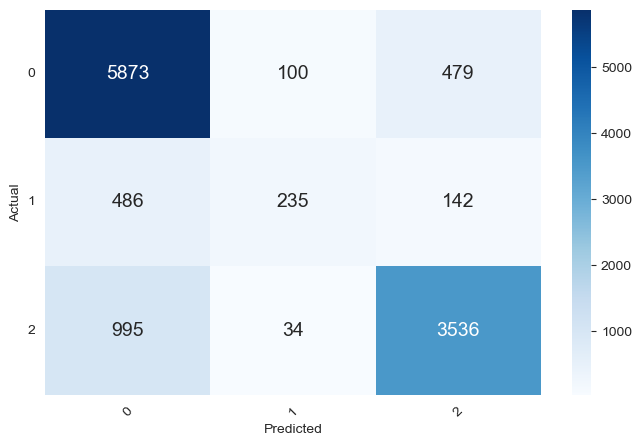

In [ ]:
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=8, n_estimators=150, random_state=42, warm_start=True)

if sw_rf:

    cv = KFold(n_splits=10, shuffle = True,  random_state=1)
    
    #fit and predict
    rf.fit(X_train, y_train)
    pred= rf.predict(X_test)
    pred_train = rf.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    cv_score = mean(n_scores)

    rf_acc = round(cv_score*100, 2)
    rf_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9243

Accuracy score (test): 0.8145

Precision score (train): 0.9252

Precision score (test): 0.8092

Recall score (train): 0.9243

Recall score (test): 0.8145

F1 score (train): 0.9212

F1 score (test): 0.8042

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.27      0.38       863
           2       0.85      0.78      0.82      4565

    accuracy                           0.81     11880

   macro avg       0.76      0.66      0.68     11880

weighted avg       0.81      0.81      0.80     11880

### XGBoost

BrendaLoznik's solution extended with our parameters tuning

In [ ]:
# # Parameter tuning
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# param_grid = { 
#     'n_estimators': [50, 100, 200],
#     'colsample_bytree' :[ 0.3, 0.4, 0.5],
#     'eta': [0.15, 0.2, 0.3],
#     'max_depth': [10, 11, 12, 13, 14, 15]
#     }

# #Create a based model
# xgb = XGBClassifier( random_state=42)

# grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

# #fitmodel
# grid_search_xgb.fit(X_train, y_train,  eval_metric = 'mlogloss',)

# #print best parameters 
# print('Best Score:', grid_search_xgb.best_score_)
# print('Parameters:', grid_search_xgb.best_params_)
# print('Best Model:', grid_search_xgb.best_estimator_)

Best Score: 0.8132495737302167

Parameters: {'colsample_bytree': 0.3, 'eta': 0.15, 'max_depth': 12, 'n_estimators': 100}

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy score (train): 0.9255
Accuracy score (test): 0.8093
Precision score (train): 0.9277
Precision score (test): 0.8043
Recall score (train): 0.9255
Recall score (test): 0.8093
F1 score (train): 0.9232
F1 score (test): 0.7980
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.63      0.25      0.36       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.81      0.80     11880



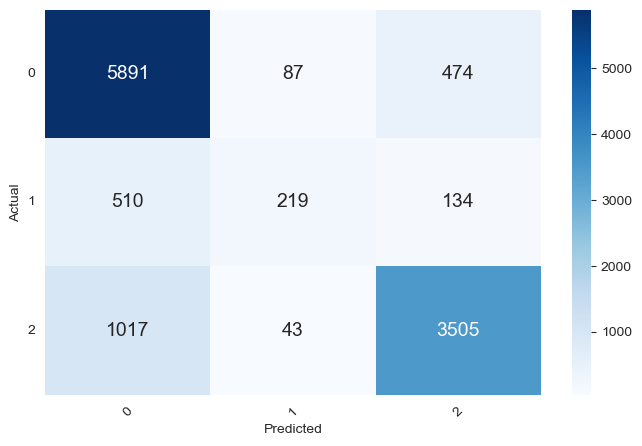

In [ ]:
xgb = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 42)

if sw_xgb:

    #fit and predict
    xgb.fit(X_train, y_train)
    pred= xgb.predict(X_test)
    pred_train = xgb.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    xgb_acc = round(accuracy_test*100, 2)
    xgb_f1 = round(f1_test*100, 2)

    #0.8103495737302167

Accuracy score (train): 0.9322

Accuracy score (test): 0.8132

Precision score (train): 0.9338

Precision score (test): 0.8087

Recall score (train): 0.9322

Recall score (test): 0.8132

F1 score (train): 0.9304

F1 score (test): 0.8027

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.27      0.38       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.81     11880

   macro avg       0.76      0.65      0.68     11880

weighted avg       0.81      0.81      0.80     11880

### CatBoost

Performed by BrendaLoznik with the following results:
- `rsm`: 0.2
- `max_depth`: '9'
- `iterations`: 1000

Learning rate set to 0.096348
0:	learn: 1.0280782	total: 73.1ms	remaining: 1m 13s
1:	learn: 0.9684638	total: 84.2ms	remaining: 42s
2:	learn: 0.9214428	total: 93ms	remaining: 30.9s
3:	learn: 0.8861564	total: 102ms	remaining: 25.3s
4:	learn: 0.8518173	total: 114ms	remaining: 22.7s
5:	learn: 0.8251527	total: 123ms	remaining: 20.3s
6:	learn: 0.7990563	total: 131ms	remaining: 18.6s
7:	learn: 0.7775904	total: 140ms	remaining: 17.3s
8:	learn: 0.7590371	total: 147ms	remaining: 16.2s
9:	learn: 0.7423367	total: 155ms	remaining: 15.4s
10:	learn: 0.7272776	total: 166ms	remaining: 14.9s
11:	learn: 0.7145868	total: 199ms	remaining: 16.4s
12:	learn: 0.7036520	total: 208ms	remaining: 15.8s
13:	learn: 0.6940148	total: 222ms	remaining: 15.6s
14:	learn: 0.6855578	total: 230ms	remaining: 15.1s
15:	learn: 0.6768659	total: 238ms	remaining: 14.6s
16:	learn: 0.6687687	total: 247ms	remaining: 14.3s
17:	learn: 0.6622002	total: 256ms	remaining: 14s
18:	learn: 0.6564793	total: 265ms	remaining: 13.7s
19:	learn: 0.

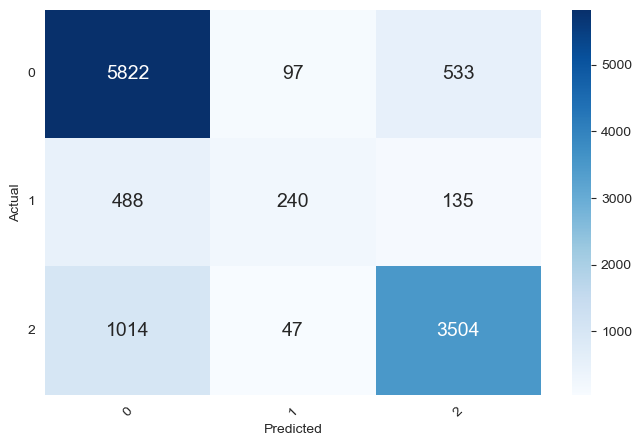

In [ ]:
cat = CatBoostClassifier(rsm=0.2, max_depth=9, iterations=1000, random_state=42)

if sw_cat:

    #fit and predict
    cat.fit(X_train, y_train)
    pred= cat.predict(X_test)
    pred_train = cat.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    cat_acc = round(accuracy_test*100, 2)
    cat_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.8889

Accuracy score (test): 0.8071

Precision score (train): 0.8904

Precision score (test): 0.8019

Recall score (train): 0.8889

Recall score (test): 0.8071

F1 score (train): 0.8855

F1 score (test): 0.7976

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.62      0.29      0.40       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.81     11880

   macro avg       0.75      0.65      0.68     11880

weighted avg       0.80      0.81      0.80     11880

### Bagging Classifier

Performed by BrendaLoznik with the following results:
- `n_estimators`: 1000
- `max_features`: '0.4'

Accuracy score (train): 0.9940
Accuracy score (test): 0.8048
Precision score (train): 0.9940
Precision score (test): 0.7992
Recall score (train): 0.9940
Recall score (test): 0.8048
F1 score (train): 0.9939
F1 score (test): 0.7939
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.61      0.26      0.36       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.75      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



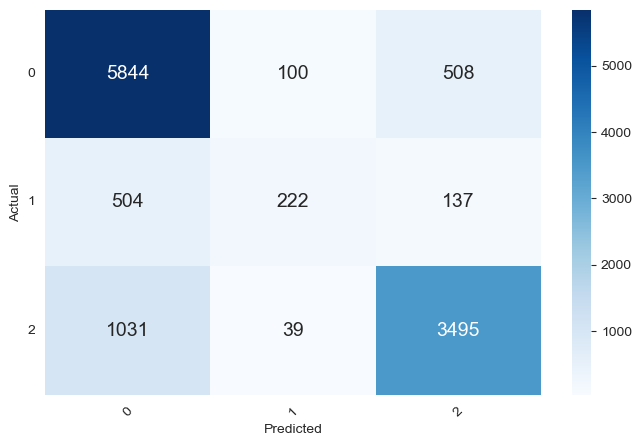

In [ ]:
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4)

if sw_bag:

    #fit and predict
    bag.fit(X_train, y_train)
    pred= bag.predict(X_test)
    pred_train = bag.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    bag_acc = round(accuracy_test*100, 2)
    bag_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9959

Accuracy score (test): 0.8104

Precision score (train): 0.9959

Precision score (test): 0.8047

Recall score (train): 0.9959

Recall score (test): 0.8104

F1 score (train): 0.9959

F1 score (test): 0.8006

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.62      0.28      0.38       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880

   macro avg       0.76      0.65      0.68     11880

weighted avg       0.80      0.81      0.80     11880

### Weighted vote

Solution by BrendaLoznik extended with our parameter tuning

In [ ]:
# rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
# xgb = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42) 
# cat = CatBoostClassifier(max_depth = 9, rsm = 0.2, iterations = 1000, random_state = 42)
# bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=42) 

In [ ]:
# Hyperparameter tuning

# import random

# # Create training and test sets: test size 0.2
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# best_weights = [0, 0, 0, 0]
# best_acc = 0.0

# i = 0

# while True:
#     i+=1

#     w = [round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3)]

#     vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = w)         

#     #fit and predict
#     vc.fit(X_train , y_train)
#     pred= vc .predict(X_test)
#     pred_train = vc .predict(X_train)

#     acc = accuracy_score(y_test, pred)

#     #print best model scores on test data
#     print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
#     print("Accuracy score test: {}".format(acc))
#     print("Weights:", w)

#     if acc > best_acc:
#         best_acc = acc
#         best_weights = w

#     print("Best weights:", best_weights, "with result:", best_acc)

#     # open the file in write mode
#     with open('output.txt', 'a') as f:
#         # print best model scores on test data to file
#         f.write("\nIteration: {}\n".format(i))
#         f.write("Accuracy score train: {}\n".format(accuracy_score(y_train, pred_train)))
#         f.write("Accuracy score test: {}\n".format(acc))
#         f.write("Weights: {}\n".format(w))
#         f.write("Best weights: {} with result: {}\n".format(best_weights, best_acc))


# # Best weights: [0.861, 0.78, 0.706, 0.751] with 

Best Score: 0.8175925925925925

Best Weights: [0.861, 0.78, 0.706, 0.751]

Best result out of 211 iterations.

Learning rate set to 0.096348
0:	learn: 1.0280782	total: 9.17ms	remaining: 9.16s
1:	learn: 0.9684638	total: 19.5ms	remaining: 9.74s
2:	learn: 0.9214428	total: 28.1ms	remaining: 9.34s
3:	learn: 0.8861564	total: 36.6ms	remaining: 9.11s
4:	learn: 0.8518173	total: 49ms	remaining: 9.75s
5:	learn: 0.8251527	total: 66.8ms	remaining: 11.1s
6:	learn: 0.7990563	total: 75.1ms	remaining: 10.7s
7:	learn: 0.7775904	total: 84.4ms	remaining: 10.5s
8:	learn: 0.7590371	total: 92.1ms	remaining: 10.1s
9:	learn: 0.7423367	total: 102ms	remaining: 10.1s
10:	learn: 0.7272776	total: 111ms	remaining: 9.96s
11:	learn: 0.7145868	total: 122ms	remaining: 10s
12:	learn: 0.7036520	total: 131ms	remaining: 9.93s
13:	learn: 0.6940148	total: 139ms	remaining: 9.77s
14:	learn: 0.6855578	total: 148ms	remaining: 9.7s
15:	learn: 0.6768659	total: 155ms	remaining: 9.55s
16:	learn: 0.6687687	total: 164ms	remaining: 9.49s
17:	learn: 0.6622002	total: 174ms	remaining: 9.47s
18:	learn: 0.6564793	total: 183ms	remaining: 9.43s
19:	lea

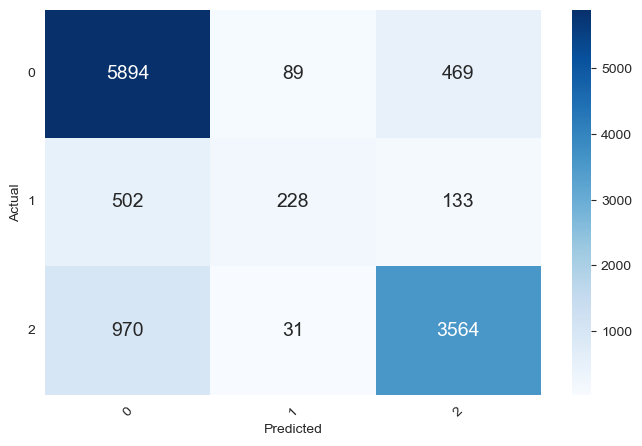

In [ ]:
if sw_weight:

    # Create training and test sets: test size 0.2
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

    vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.861, 0.78, 0.706, 0.751])
    # vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])

    #fit and predict
    vc.fit(X_train , y_train)
    pred= vc .predict(X_test)
    pred_train = vc .predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    weight_acc = round(accuracy_test*100, 2)
    weight_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9610

Accuracy score (test): 0.8175

Precision score (train): 0.9617

Precision score (test): 0.8129

Recall score (train): 0.9610

Recall score (test): 0.8175

F1 score (train): 0.9604

F1 score (test): 0.8075

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.65      0.28      0.39       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880

   macro avg       0.77      0.66      0.69     11880
   
weighted avg       0.81      0.82      0.81     11880

### Stacking

Solution by BrendaLoznik

Learning rate set to 0.096348
0:	learn: 1.0280782	total: 13.5ms	remaining: 13.5s
1:	learn: 0.9684638	total: 24.2ms	remaining: 12.1s
2:	learn: 0.9214428	total: 47.1ms	remaining: 15.7s
3:	learn: 0.8861564	total: 57ms	remaining: 14.2s
4:	learn: 0.8518173	total: 68.9ms	remaining: 13.7s
5:	learn: 0.8251527	total: 78.9ms	remaining: 13.1s
6:	learn: 0.7990563	total: 87ms	remaining: 12.3s
7:	learn: 0.7775904	total: 97.2ms	remaining: 12s
8:	learn: 0.7590371	total: 105ms	remaining: 11.6s
9:	learn: 0.7423367	total: 117ms	remaining: 11.5s
10:	learn: 0.7272776	total: 126ms	remaining: 11.3s
11:	learn: 0.7145868	total: 136ms	remaining: 11.2s
12:	learn: 0.7036520	total: 145ms	remaining: 11s
13:	learn: 0.6940148	total: 154ms	remaining: 10.8s
14:	learn: 0.6855578	total: 163ms	remaining: 10.7s
15:	learn: 0.6768659	total: 184ms	remaining: 11.3s
16:	learn: 0.6687687	total: 193ms	remaining: 11.2s
17:	learn: 0.6622002	total: 204ms	remaining: 11.1s
18:	learn: 0.6564793	total: 215ms	remaining: 11.1s
19:	learn: 

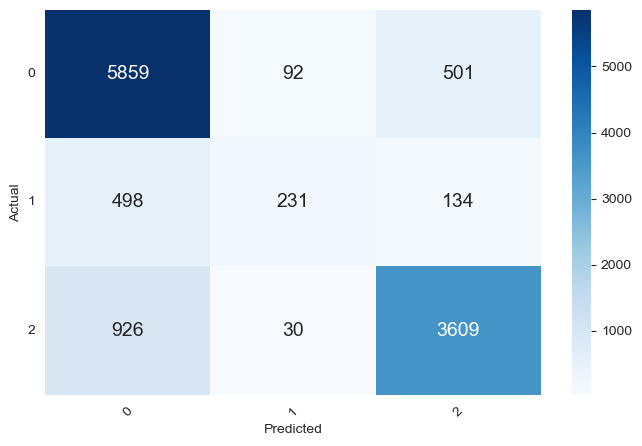

In [ ]:
if sw_stack:

    # Create training and test sets: test size 0.2
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


    stack = StackingClassifier(
        estimators=[('rf', rf), ('xgb', xgb), ('cat', cat), ('bag', bag)],
        final_estimator=LogisticRegression()
        )

    #fit and predict
    stack.fit(X_train, y_train)
    pred= stack.predict(X_test)
    pred_train = stack.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    stack_acc = round(accuracy_test*100, 2)
    stack_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9518

Accuracy score (test): 0.8173

Precision score (train): 0.9525

Precision score (test): 0.8118

Recall score (train): 0.9518

Recall score (test): 0.8173

F1 score (train): 0.9508

F1 score (test): 0.8070

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.82     11880

   macro avg       0.77      0.66      0.69     11880

weighted avg       0.81      0.82      0.81     11880

## New models

### 11 XGBoost Ensemble

Accuracy score (train): 0.9270
Accuracy score (test): 0.8113
Precision score (train): 0.9289
Precision score (test): 0.8071
Recall score (train): 0.9270
Recall score (test): 0.8113
F1 score (train): 0.9245
F1 score (test): 0.7995
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6452
           1       0.64      0.25      0.36       863
           2       0.86      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.81      0.81      0.80     11880



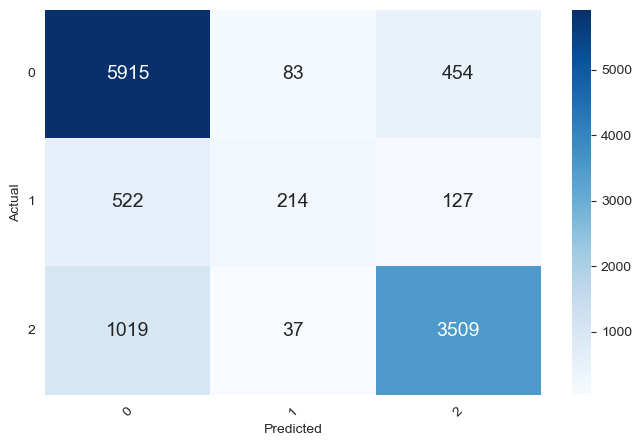

In [ ]:
if sw_xgb_ens:

    # Best performing model - ensembled
    xgb1 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 42)
    xgb2 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 2) 
    xgb3 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 142) 
    xgb4 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 33 )
    xgb5 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 678)
    xgb6 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 53)
    xgb7 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 23)
    xgb8 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 63)
    xgb9 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 342)
    xgb10 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 634)
    xgb11 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 5)

    # Create training and test sets: test size 0.2
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

    vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5), ('xgb6', xgb6), ('xgb7', xgb7), ('xgb8', xgb8), ('xgb9', xgb9), ('xgb10', xgb10), ('xgb11', xgb11)], voting = 'soft')       

    #fit and predict
    vc.fit(X_train , y_train)
    pred= vc .predict(X_test)
    pred_train = vc .predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))

    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    xgb_ens_acc = round(accuracy_test*100, 2)
    xgb_ens_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9305

Accuracy score (test): 0.8152

Precision score (train): 0.9323

Precision score (test): 0.8115

Recall score (train): 0.9305

Recall score (test): 0.8152

F1 score (train): 0.9284

F1 score (test): 0.8044

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880

   macro avg       0.77      0.65      0.68     11880

weighted avg       0.81      0.82      0.80     11880

### Light GBM

In [ ]:
# Hyperparameter tuning
# param_grid_lgbm = {
#     'max_depth': [7, 8, 9],
#     'num_iterations': [1000, 750],
#     'bagging_fraction': [0.3, 0.2]
# }

# lgbm = LGBMClassifier(random_state=42)
# grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, verbose=2, scoring='accuracy')
# grid_search_lgbm.fit(X_train, y_train)

# print('LightGBM - Best Score:', grid_search_lgbm.best_score_)
# print('LightGBM - Best Parameters:', grid_search_lgbm.best_params_)
# print('LightGBM - Best Model:', grid_search_lgbm.best_estimator_)
# print()

Best Score: 0.8018

Best Parameters: {'bagging_fraction': 0.3, 'max_depth': 9, 'num_iterations': 1000}

Best Model: GradientBoostingClassifier(bagging_fraction=0.3, max_depth=9, num_iterations=1000, random_state=42)

In [ ]:
if sw_lgbm:

    # Best performing model
    lgbm = LGBMClassifier(max_depth=9, n_estimators=1000, learning_rate=0.01, random_state=42)

    #fit and predict
    lgbm.fit(X_train , y_train)
    pred= lgbm .predict(X_test)
    pred_train = lgbm .predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    lgbm_acc = round(accuracy_test*100, 2)
    lgbm_f1 = round(f1_test*100, 2)

NameError: name 'LGBMClassifier' is not defined

### Gradient Boosting

In [ ]:
# Hyperparameter tuning
# param_grid_gb = {
#     'max_depth': [7, 8, 9],
#     'n_estimators': [1000, 750],
#     'learning_rate': [0.1, 0.01]
# }

# gb = GradientBoostingClassifier(random_state=42)
# grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, verbose=2, scoring='accuracy')
# grid_search_gb.fit(X_train, y_train)

# print('Gradient Boosting - Best Score:', grid_search_gb.best_score_)
# print('Gradient Boosting - Best Parameters:', grid_search_gb.best_params_)
# print('Gradient Boosting - Best Model:', grid_search_gb.best_estimator_)
# print()

Best Score: 0.8030682850108294

Best Parameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000}

Best Model: GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1000, random_state=42)

In [ ]:
gb = GradientBoostingClassifier(max_depth=9, n_estimators=1000, learning_rate=0.01, random_state=42)

if sw_gb:

    #fit and predict
    gb.fit(X_train, y_train)
    pred= gb.predict(X_test)
    pred_train = gb.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    gb_acc = round(accuracy_test*100, 2)
    gb_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.8953

Accuracy score (test): 0.8033

Precision score (train): 0.8994

Precision score (test): 0.7987

Recall score (train): 0.8953

Recall score (test): 0.8033

F1 score (train): 0.8912

F1 score (test): 0.7922

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.61      0.26      0.36       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880

   macro avg       0.75      0.64      0.67     11880

weighted avg       0.80      0.80      0.79     11880

### AdaBoost

In [ ]:
# Hyperparameter tuning
# param_grid_ada = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# ada = AdaBoostClassifier(random_state=42)
# grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, verbose=2, scoring='accuracy')
# grid_search_ada.fit(X_train, y_train)

# print('AdaBoost - Best Score:', grid_search_ada.best_score_)
# print('AdaBoost - Best Parameters:', grid_search_ada.best_params_)
# print('AdaBoost - Best Model:', grid_search_ada.best_estimator_)
# print()

Best Score: 0.7343167659087632

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}

Best Model: AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=42)

In [ ]:
ada = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)

if sw_ada:

    #fit and predict
    ada.fit(X_train , y_train)
    pred= ada.predict(X_test)
    pred_train = ada.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    ada_acc = round(accuracy_test*100, 2)
    ada_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.7360

Accuracy score (test): 0.7355

Precision score (train): 0.7318

Precision score (test): 0.7245

Recall score (train): 0.7360

Recall score (test): 0.7355

F1 score (train): 0.7049

F1 score (test): 0.7046

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      6452
           1       0.46      0.02      0.03       863
           2       0.79      0.63      0.70      4565

    accuracy                           0.74     11880

   macro avg       0.66      0.52      0.51     11880

weighted avg       0.72      0.74      0.70     11880

### Extra Trees

In [ ]:
# Hyperparameter tuning
# param_grid_etc = {
#     'max_depth': [7, 8, 9],
#     'n_estimators': [100, 200, 300],
#     'min_samples_split': [2, 4, 6]
# }

# etc = ExtraTreesClassifier(random_state=42)
# grid_search_etc = GridSearchCV(estimator=etc, param_grid=param_grid_etc, cv=5, verbose=2, scoring='accuracy')
# grid_search_etc.fit(X_train, y_train)

# print('Extra Trees Classifier - Best Score:', grid_search_etc.best_score_)
# print('Extra Trees Classifier - Best Parameters:', grid_search_etc.best_params_)
# print('Extra Trees Classifier - Best Model:', grid_search_etc.best_estimator_)
# print()

Best Score: 0.7503104017125904

Best Parameters: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 200}

Best Model: ExtraTreesClassifier(max_depth=9, min_samples_split=4, n_estimators=200,
                     random_state=42)

In [ ]:
etc = ExtraTreesClassifier(max_depth=9, n_estimators=200, min_samples_split=4, random_state=42)

if sw_etc:

    #fit and predict
    etc.fit(X_train, y_train)
    pred= etc.predict(X_test)
    pred_train = etc.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    etc_acc = round(accuracy_test*100, 2)
    etc_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.7544

Accuracy score (test): 0.7503

Precision score (train): 0.7671

Precision score (test): 0.7620

Recall score (train): 0.7544

Recall score (test): 0.7503

F1 score (train): 0.7220

F1 score (test): 0.7176

              precision    recall  f1-score   support

           0       0.72      0.94      0.81      6452
           1       0.71      0.01      0.02       863
           2       0.84      0.63      0.72      4565

    accuracy                           0.75     11880

   macro avg       0.76      0.52      0.52     11880

weighted avg       0.76      0.75      0.72     11880

### Artificial Neural Networks

In [ ]:
# Hyperparameter tuning
# param_grid_nn = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate': ['constant', 'adaptive']
# }

# nn = MLPClassifier(random_state=42)
# grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, verbose=2, scoring='accuracy')
# grid_search_nn.fit(X_train, y_train)

# print('Neural Networks - Best Score:', grid_search_nn.best_score_)
# print('Neural Networks - Best Parameters:', grid_search_nn.best_params_)
# print('Neural Networks - Best Model:', grid_search_nn.best_estimator_)
# print()

Best Score: 0.7349692490338866

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Best Model: MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', learning_rate='constant', random_state=42)

if sw_nn:

    #fit and predict
    nn.fit(X_train, y_train)
    pred= nn.predict(X_test)
    pred_train = nn.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    nn_acc = round(accuracy_test*100, 2)
    nn_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.7541

Accuracy score (test): 0.7465

Precision score (train): 0.7502

Precision score (test): 0.7330

Recall score (train): 0.7541

Recall score (test): 0.7465

F1 score (train): 0.7250

F1 score (test): 0.7167

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6452
           1       0.46      0.02      0.03       863
           2       0.80      0.66      0.72      4565

    accuracy                           0.75     11880

   macro avg       0.66      0.53      0.52     11880

weighted avg       0.73      0.75      0.72     11880

### Weighted Vote of the best found models

In [ ]:
# vc = VotingClassifier([MODELS], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])
# vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.861, 0.78, 0.706, 0.751])

if sw_fin_weight:

    #fit and predict
    vc.fit(X_train, y_train)
    pred= vc.predict(X_test)
    pred_train = vc.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    fin_weight_acc = round(accuracy_test*100, 2)
    fin_weight_f1 = round(f1_test*100, 2)

## Store results in a file

In [ ]:
with open('results.csv', 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=column_names)

    # Fill the row with data
    row_data = {}
    for column in column_names:
        # Assuming the data comes from parameters with the same name
        row_data[column] = globals().get(column, "")

    writer.writerow(row_data)

## Submission to competition

Make sure `sw_gps_height_model_imput` was set to `False` for the entire execution, as it is against the competition rules to use external data for imputation.

In [ ]:
test_set.describe()

,component1,component2,component3,component4,component5,component6,component7,component8,id
count,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,108.601492,0.454184,-0.733355,2.039389,-1.019188,0.181152,-0.032348,-0.108824,37161.972929
std,41.304986,35.973683,32.821913,8.164652,4.772602,4.379267,2.872580,2.247636,21359.364833
min,23.007397,-87.761690,-72.622685,-20.506626,-11.561595,-9.623770,-6.573116,-7.650351,10.000000
25%,79.715089,-26.393042,-27.020636,-3.983041,-4.793088,-2.868760,-2.014858,-1.695221,18727.000000
50%,110.816730,-1.048588,-0.284377,2.426334,-1.397695,-0.820151,-0.772916,0.048184,37361.500000
75%,138.247903,24.586629,17.731289,7.916337,2.492627,2.717248,2.102038,1.465468,55799.750000
max,223.422138,116.532058,87.257337,22.798172,14.918685,15.801485,9.960681,7.441989,74249.000000


In [ ]:
if sw_gen_comp_file:

    # Select the model to submit
    model = vc

    #fit on foll training set
    model.fit(X , y)

    #predict
    submission = test_set.drop(['id', 'status_group'], axis=1)
    submission['status_group'] = model.predict(submission)

    #bring the id column back
    submission['id'] = test_set['id']

    #create df for submission and save
    best_submission = submission[['id', 'status_group']]

    best_submission['status_group'] = encoder.inverse_transform(best_submission['status_group'])

    best_submission.to_csv('best_submission.csv', index=False)

/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/781767202.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_submission['status_group'] = encoder.inverse_transform(best_submission['status_group'])
